Biblioteka TensorFlow: Addons, operacje na zdjęciach.

Źródło: https://www.tensorflow.org/addons/tutorials/image_ops

Instalacja biblioteki Addons.

In [38]:
pip install -q -U tensorflow-addons

Importowanie potrzebnych bibliotek

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

Wczytanie zdjęcia.

In [41]:
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')

Wypisanie zdjęcia na ekran, ze wskazaniem konkretnej rozdzielczości.

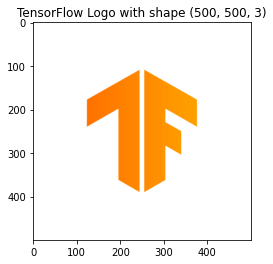

In [40]:
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])

plt.title("TensorFlow Logo with shape {}".format(img.shape))
_ = plt.imshow(img)

Wyświetlenie zdjęcia w wersji czarno-białej.

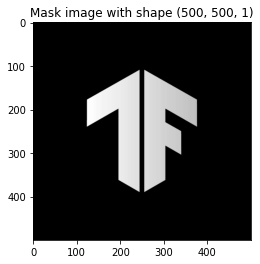

In [42]:
bw_img = 1.0 - tf.image.rgb_to_grayscale(img)

plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap='gray')

Zastosowanie filtrowania średniego - usunięcie szumu, przejście po każdym pikselu zdjęcia i zastopięniu go średnimi wartościami sąsiednich pikseli.

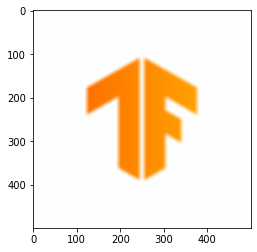

In [43]:
mean = tfa.image.mean_filter2d(img, filter_shape=11)
_ = plt.imshow(mean)

Obrócenie obrazu, kąt podawany w radianach (pi/8)

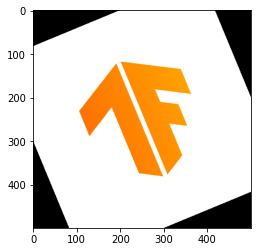

In [44]:
rotate = tfa.image.rotate(img, tf.constant(np.pi/8))
_ = plt.imshow(rotate)

Przekształcenie zdjęcia za pomocą odpowiednich parametrów w funkcji tfa.image.transform

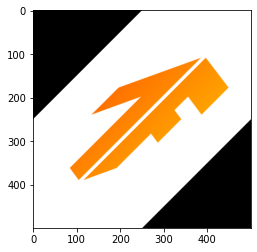

In [45]:
transform = tfa.image.transform(img, [1.0, 1.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])
_ = plt.imshow(transform)

HSV w YIQ, zmiana skali kolorów z obrazu RGB na YIQ, ale wartości odcieni i nasycenia są wybierane losowo.

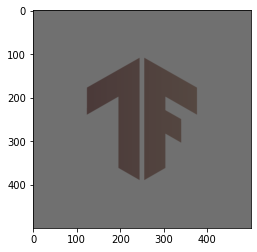

In [52]:
delta = 0.5
lower_saturation = 0.1
upper_saturation = 0.9
lower_value = 0.2
upper_value = 0.8
rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation, upper_saturation, lower_value, upper_value)
_ = plt.imshow(rand_hsvinyiq)

HSV w YIQ, zmiana skali kolorów z obrazu RGB na YIQ, ale wartości odcieni i nasycenia są wybierane przez użytkownika.

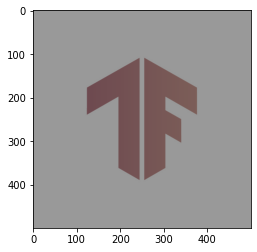

In [53]:
delta = 0.5
saturation = 0.3
value = 0.6
adj_hsvinyiq = tfa.image.adjust_hsv_in_yiq(img, delta, saturation, value)
_ = plt.imshow(adj_hsvinyiq)

Gęste wypaczanie obrazu, nieliniowe wypaczanie obrazu określonego przez pole przepływu wektora przesunięcia. Niżej zostały wykorzystane losowe wartości.

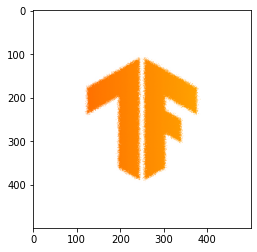

In [48]:
input_img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)

flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)
dense_img_warp = tfa.image.dense_image_warp(input_img, init_flows)
dense_img_warp = tf.squeeze(dense_img_warp, 0)
_ = plt.imshow(dense_img_warp)

Euklidesowa transformacja odległości, operacja, która podmienia wartość piksela o odległość euklidesową od piksela pierwszego planu do piksela tła.

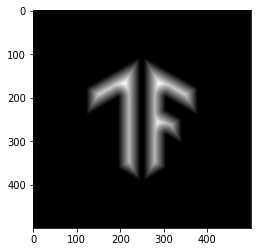

In [49]:
gray = tf.image.convert_image_dtype(bw_img,tf.uint8)
# The op expects a batch of images, so add a batch dimension
gray = tf.expand_dims(gray, 0)
eucid = tfa.image.euclidean_dist_transform(gray)
eucid = tf.squeeze(eucid, (0, -1))
_ = plt.imshow(eucid, cmap='gray')